In [1]:
import tensorflow as tf

w = tf.Variable(2.)
def f(w):
  y = w**2
  z = 2*y + 5
  return z


with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)
# 2w**2+b

#가설 함수
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
  return w*x+b

x_test = [3.5, 5, 5.5, 6]

print(hypothesis(x_test).numpy())

#손실 함수
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

optimizer = tf.optimizers.SGD(0.01)



[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]
[15. 21. 23. 25.]


In [2]:
for i in range(301):
  
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)
    # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w,b])
    
  optimizer.apply_gradients(zip(gradients, [w,b]))
  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [3]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

model.add(Dense(1, input_dim=1, activation="linear"))
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse']) #평균제곱

model.fit(x, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 3105.0334 - mse: 3105.0334
Epoch 2/300
1/1 [==============================] - 0s 1000us/step - loss: 383.0778 - mse: 383.0778
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 48.1608 - mse: 48.1608
Epoch 4/300
1/1 [==============================] - 0s 999us/step - loss: 6.9510 - mse: 6.9510
Epoch 5/300
1/1 [==============================] - 0s 1000us/step - loss: 1.8796 - mse: 1.8796
Epoch 6/300
1/1 [==============================] - 0s 1000us/step - loss: 1.2549 - mse: 1.2549
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 1.1772 - mse: 1.1772
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1669 - mse: 1.1669
Epoch 9/300
1/1 [==============================] - 0s 1000us/step - loss: 1.1649 - mse: 1.1649
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 1.1639 - mse: 1.1639
Epoch 11/300
1/1 [==============================] - 0s

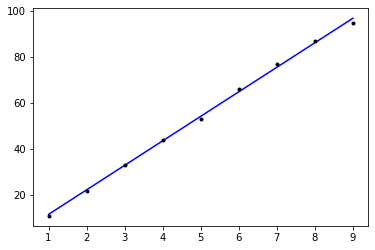

In [5]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')
plt.show()

In [6]:
print(model.predict([9.3]))

[[100.05915]]


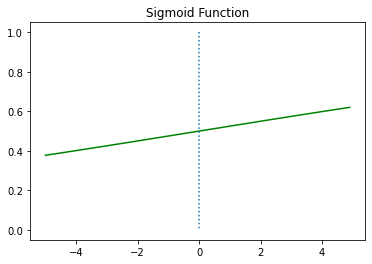

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(0.1* x)
plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()


In [8]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5742 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 1000us/step - loss: 0.5726 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5710 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5694 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 0s/step - loss: 0.5678 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5662 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5646 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 0s/step - loss: 0.5630 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 0.5613 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 1ms/step

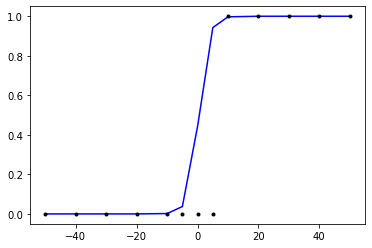

In [9]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [10]:
print(model.predict([1, 2, 3, 4, 4.5]))

[[0.593737  ]
 [0.7280262 ]
 [0.83059174]
 [0.8998016 ]
 [0.9239749 ]]


In [11]:
print(model.predict([11, 21, 31, 41, 90]))

[[0.99839234]
 [0.9999962 ]
 [1.        ]
 [1.        ]
 [1.        ]]


In [12]:
#다중입력 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

# x가 세개  차원이 세개
model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))


sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 999us/step - loss: 17857.0586 - mse: 17857.0586
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 9436.6152 - mse: 9436.6152
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 4990.1763 - mse: 4990.1763
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 2641.2361 - mse: 2641.2361
Epoch 5/2000
1/1 [==============================] - 0s 0s/step - loss: 1399.6945 - mse: 1399.6945
Epoch 6/2000
1/1 [==============================] - 0s 518us/step - loss: 743.0358 - mse: 743.0358
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 395.4340 - mse: 395.4340
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 211.2370 - mse: 211.2370
Epoch 9/2000
1/1 [==============================] - 0s 998us/step - loss: 113.4998 - mse: 113.4998
Epoch 10/2000
1/1 [==============================] - 0s 1ms/step - loss: 61.5525 - mse: 61.5525
Epoch 11/2000


In [13]:
print(model.predict(X))

[[72.92676 ]
 [81.97754 ]
 [72.09797 ]
 [57.117027]
 [33.804752]]


In [14]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.893623]
 [56.064777]]


In [15]:
#다중 로지스틱

X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

print(model.predict(X))

Epoch 1/2000
1/1 [==============================] - 0s 999us/step - loss: 0.6725 - binary_accuracy: 0.6667
Epoch 2/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6721 - binary_accuracy: 0.6667
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6716 - binary_accuracy: 0.6667
Epoch 4/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6712 - binary_accuracy: 0.6667
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6708 - binary_accuracy: 0.6667
Epoch 6/2000
1/1 [==============================] - 0s 999us/step - loss: 0.6703 - binary_accuracy: 0.6667
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6667
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6695 - binary_accuracy: 0.6667
Epoch 9/2000
1/1 [==============================] - 0s 999us/step - loss: 0.6691 - binary_accuracy: 0.6667
Epoch 10/2000
1/1 [==============================] 

In [16]:
#벡터 행렬
import numpy as np
A = np.array([8, 4, 5])
B = np.array([1, 2, 3])
print('두 벡터의 합 :',A+B)
print('두 벡터의 차 :',A-B)

두 벡터의 합 : [9 6 8]
두 벡터의 차 : [7 2 2]


In [17]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


In [18]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')

print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


c:\Users\User\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

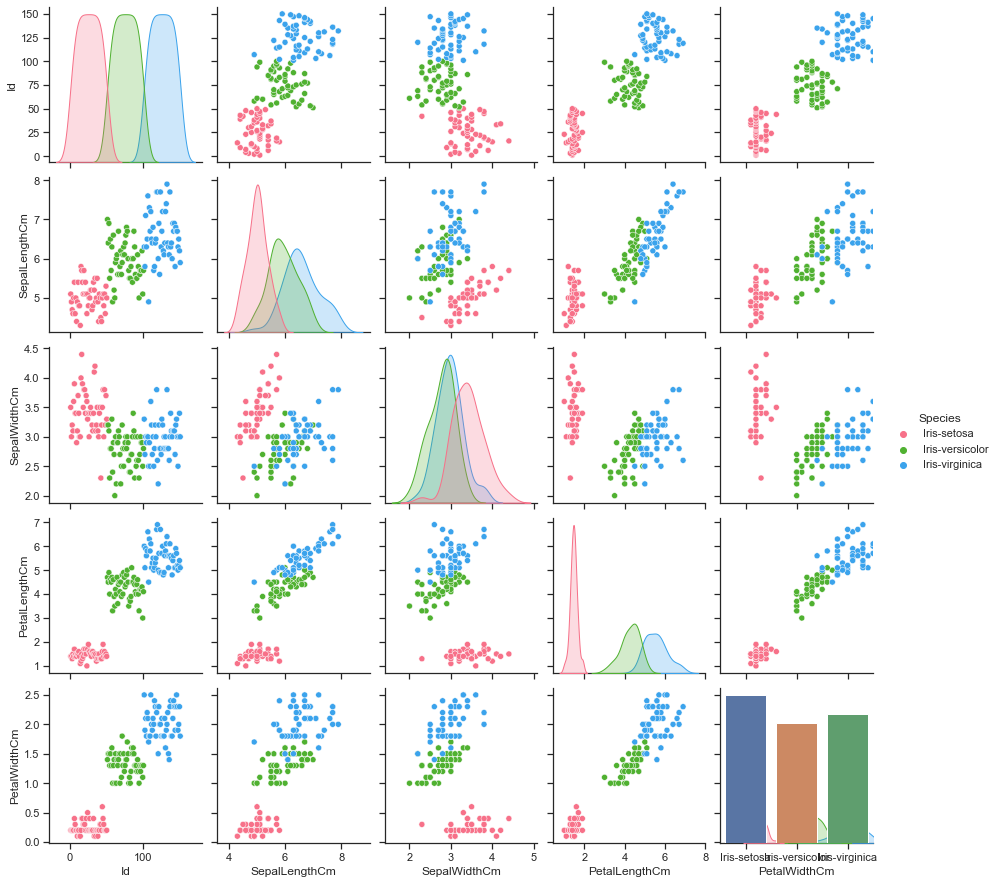

In [31]:
data = pd.read_csv('../file/Iris.csv', encoding='latin1')
print(len(data))

print(data[:5])

print("품종 종류:", data["Species"].unique(), sep="\n")

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")


c:\Users\User\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

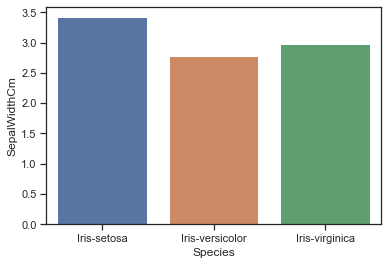

In [32]:
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

<AxesSubplot:>

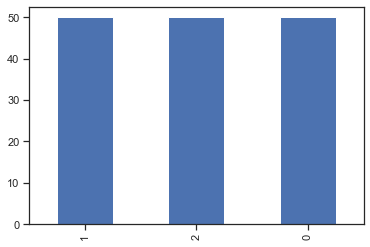

In [34]:
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [55]:
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values


data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


Epoch 1/200
120/120 [==============================] - 0s 2ms/step - loss: 4.3712 - accuracy: 0.3250 - val_loss: 4.1791 - val_accuracy: 0.3667
Epoch 2/200
120/120 [==============================] - 0s 600us/step - loss: 3.0665 - accuracy: 0.1750 - val_loss: 3.2616 - val_accuracy: 0.0000e+00
Epoch 3/200
120/120 [==============================] - 0s 648us/step - loss: 2.3236 - accuracy: 0.0500 - val_loss: 2.6516 - val_accuracy: 0.0667
Epoch 4/200
120/120 [==============================] - 0s 692us/step - loss: 1.8476 - accuracy: 0.2500 - val_loss: 2.0203 - val_accuracy: 0.1000
Epoch 5/200
120/120 [==============================] - 0s 675us/step - loss: 1.4539 - accuracy: 0.2667 - val_loss: 1.5620 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 625us/step - loss: 1.2179 - accuracy: 0.3167 - val_loss: 1.2874 - val_accuracy: 0.1667
Epoch 7/200
120/120 [==============================] - 0s 605us/step - loss: 1.1083 - accuracy: 0.2000 - val_loss: 1.1596 - val_

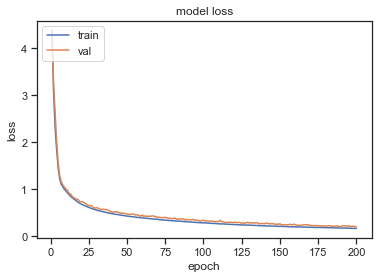

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))
epochs = range(1, len(history.history['accuracy']) + 1)



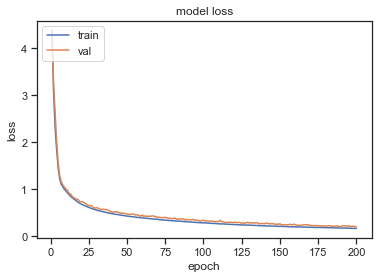

1/1 [==============================] - 0s 4ms/step - loss: 0.2012 - accuracy: 0.9667

 테스트 정확도: 0.9667


In [63]:
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print('\n 테스트 정확도: %.4f' % (model.evaluate(X_test, y_test)[1]))